In [1]:
 !pip install wget

  Using cached wget-3.2.zip (10 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=dbe54436e989bdfd2673cc0feb0ed0a0c56599a2a0b045f33f6a6ec7e3bb7fc6
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\8b\f1\7f\5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [4]:
import wget
url='https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip'
wget.download(url)

100% [......................................................................] 105946856 / 105946856

'fruits.zip'

In [3]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits/               
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/          
   creating: fruits/train/         
   creating: fruits/validation/    
   creating: fruits/test/apple/    
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/   
   creating: fruits/test/orange/   
   creating: fruits/train/apple/   
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/  
   creating: fruits/train/orange/  
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


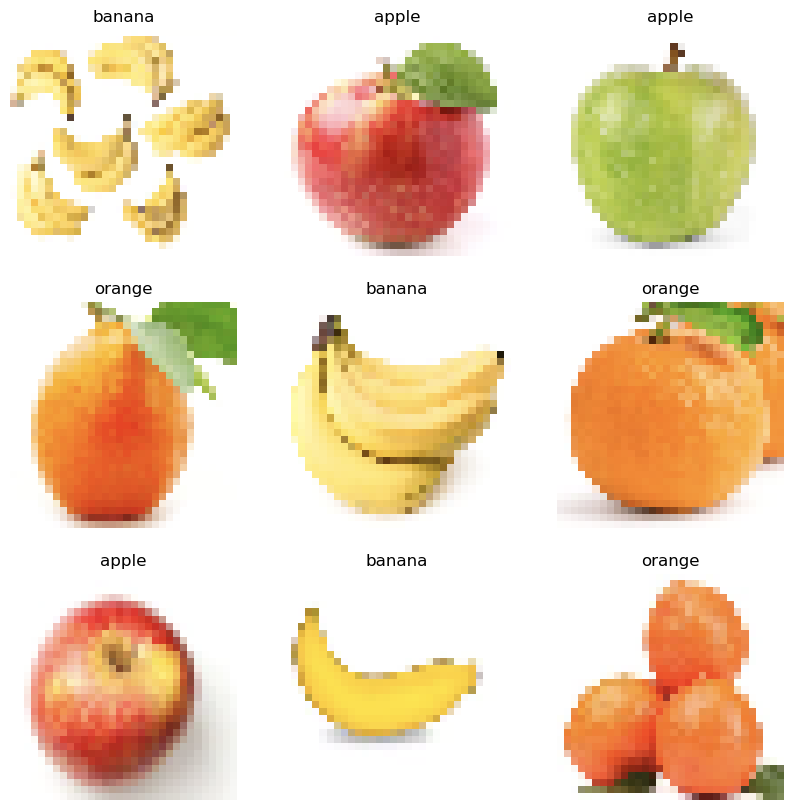

In [3]:
class_names = ["apple", "banana", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)


In [10]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [11]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
23/23 [==============================] - 4s 72ms/step - loss: 0.9977 - accuracy: 0.4457 - val_loss: 0.8159 - val_accuracy: 0.6818
Epoch 2/10
23/23 [==============================] - 1s 38ms/step - loss: 0.6244 - accuracy: 0.7630 - val_loss: 0.5657 - val_accuracy: 0.7424
Epoch 3/10
23/23 [==============================] - 1s 42ms/step - loss: 0.3971 - accuracy: 0.8326 - val_loss: 0.3348 - val_accuracy: 0.8939
Epoch 4/10
23/23 [==============================] - 1s 41ms/step - loss: 0.3800 - accuracy: 0.8413 - val_loss: 0.2784 - val_accuracy: 0.8939
Epoch 5/10
23/23 [==============================] - 1s 41ms/step - loss: 0.2369 - accuracy: 0.9304 - val_loss: 0.1883 - val_accuracy: 0.9242
Epoch 6/10
23/23 [==============================] - 1s 43ms/step - loss: 0.1920 - accuracy: 0.9391 - val_loss: 0.3373 - val_accuracy: 0.8939
Epoch 7/10
23/23 [==============================] - 1s 40ms/step - loss: 0.1844 - accuracy: 0.9391 - val_loss: 0.2546 - val_accuracy: 0.9091
Epoch 8/10
23

In [12]:
model.evaluate(test_ds)

7/7 [==============================] - 0s 9ms/step - loss: 0.3983 - accuracy: 0.8846


[0.39826658368110657, 0.8846153616905212]

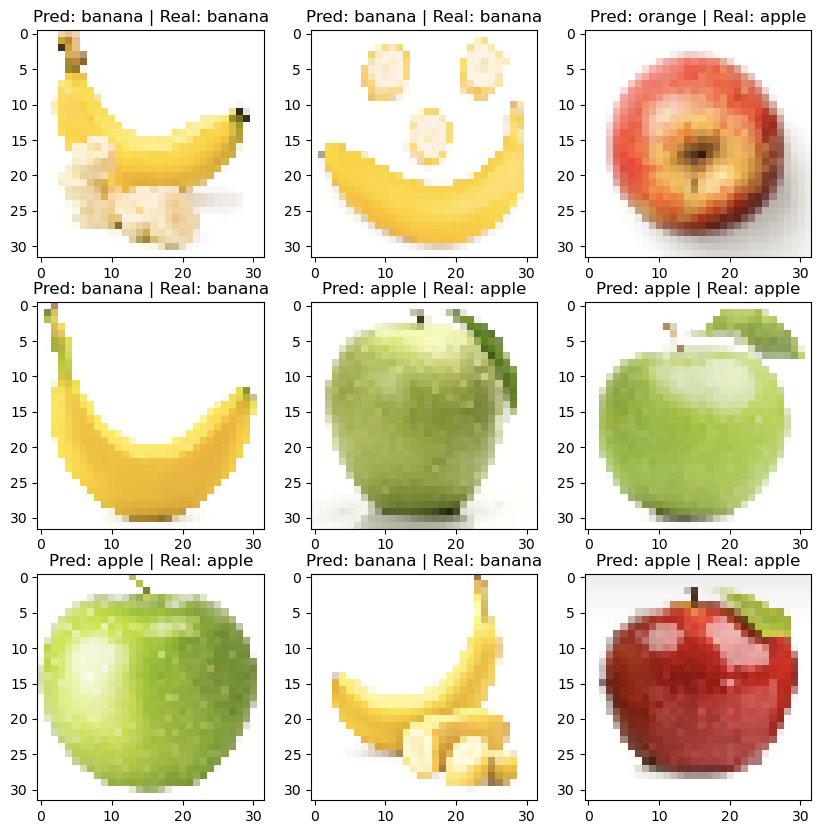

In [13]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])